## K-MEANS CLUSTERING

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#####  TASK 1 ( DATA INTERPRETATION AND PREPROCESSING )

In [2]:
#LOADING DATASET
df=pd.read_csv('Car_sales.csv')
print(df.shape)
df.head(2)

(157, 16)


,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778


In [3]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [4]:
#removing null values
df=df.dropna()
#checking for null values
df.isnull().sum()

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [5]:
df.columns

Index(['Manufacturer', 'Model', 'Sales_in_thousands', '__year_resale_value',
       'Vehicle_type', 'Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency', 'Latest_Launch', 'Power_perf_factor'],
      dtype='object')

In [6]:
#SCALING THE DATASET
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [7]:
columns=['Sales_in_thousands', '__year_resale_value','Price_in_thousands', 'Engine_size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb_weight', 'Fuel_capacity',
       'Fuel_efficiency','Power_perf_factor']
df_scaled=df.copy()
df_scaled[columns]=min_max_scaler.fit_transform(df[columns])

In [8]:
#DATASET AFTER SCALING
df_scaled

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,0.031102,0.179516,Passenger,0.167178,0.114286,0.215190,0.186551,0.281437,0.306258,0.231056,0.133641,0.433333,2/2/2012,0.212314
1,Acura,TL,0.072669,0.235855,Passenger,0.261228,0.314286,0.430380,0.336226,0.461078,0.579228,0.503727,0.317972,0.333333,6/3/2011,0.413024
3,Acura,RL,0.015687,0.393733,Passenger,0.446603,0.357143,0.392405,0.477223,0.526946,0.628495,0.607143,0.354839,0.233333,3/10/2011,0.413140
4,Audi,A4,0.037537,0.274002,Passenger,0.201118,0.114286,0.240506,0.216920,0.335329,0.380826,0.342547,0.281106,0.400000,10/8/2011,0.239594
5,Audi,A6,0.034545,0.294839,Passenger,0.336877,0.257143,0.367089,0.349241,0.808383,0.567244,0.517391,0.377880,0.233333,8/9/2011,0.371745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Volkswagen,Golf,0.017857,0.100417,Passenger,0.077217,0.142857,0.151899,0.136659,0.341317,0.185087,0.270807,0.193548,0.366667,1/24/2011,0.143555
146,Volkswagen,Jetta,0.154706,0.129508,Passenger,0.101752,0.142857,0.151899,0.136659,0.341317,0.304927,0.297516,0.193548,0.366667,8/27/2011,0.147766
147,Volkswagen,Passat,0.094351,0.185366,Passenger,0.163089,0.114286,0.240506,0.299349,0.353293,0.462051,0.356522,0.281106,0.400000,10/30/2012,0.233066
148,Volkswagen,Cabrio,0.017502,0.182962,Passenger,0.146596,0.142857,0.151899,0.104121,0.245509,0.146471,0.367702,0.156682,0.366667,5/31/2011,0.155464


##### TASK 2

##### K-MEANS CLUSTERING

In [9]:
from sklearn.cluster import KMeans

In [10]:
df1  = df_scaled[['Sales_in_thousands','Price_in_thousands']]
kmeans = KMeans(n_clusters=3,n_init=3).fit(df1)
centroids = kmeans.cluster_centers_
print(centroids)

print('Attributes used for cluster model: ', df1.columns)

[[0.07490609 0.16627982]
 [0.02735113 0.59612743]
 [0.39924902 0.13265272]]
Attributes used for cluster model:  Index(['Sales_in_thousands', 'Price_in_thousands'], dtype='object')


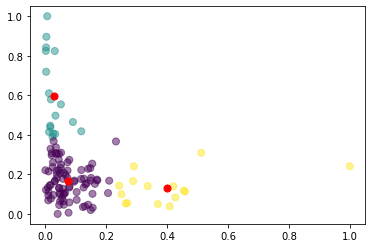

In [11]:
plt.scatter(df1['Sales_in_thousands'], df1['Price_in_thousands'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

##### TASK 3

In [12]:
df2  = df_scaled[['Width', 'Length']]
kmeans = KMeans(n_clusters=3,n_init=3).fit(df2)
centroids = kmeans.cluster_centers_
print(centroids)

print('Attributes used for cluster model: ', df2.columns)

[[0.29224884 0.31550525]
 [0.50862275 0.52431425]
 [0.78153371 0.71362914]]
Attributes used for cluster model:  Index(['Width', 'Length'], dtype='object')


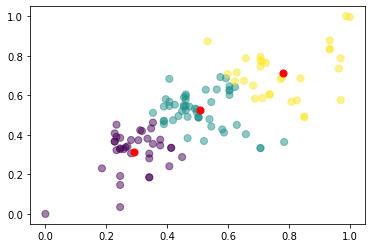

In [13]:
plt.scatter(df2['Width'], df2['Length'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

Centroids shows the midpoint(equal distance from data points) of each cluster.

And we can see extreme values in these clusters

##### TASK 4

In [14]:
# Lets add the cluster label to the data points used for clustering
clustered_df = df[columns] 
clustered_df['Manufacturer'] = df['Manufacturer']
clustered_df['Model'] = df['Model']
clustered_df['Cluster'] = kmeans.labels_
clustered_df

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Manufacturer,Model,Cluster
0,16.919,16.360,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,Acura,Integra,0
1,39.384,19.875,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,Acura,TL,1
3,8.588,29.725,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,Acura,RL,1
4,20.397,22.255,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,Audi,A4,0
5,18.780,23.555,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,84.565105,Audi,A6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,9.761,11.425,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,46.943877,Volkswagen,Golf,0
146,83.721,13.240,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,47.638237,Volkswagen,Jetta,0
147,51.102,16.725,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,61.701381,Volkswagen,Passat,0
148,9.569,16.575,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,48.907372,Volkswagen,Cabrio,0


In [15]:
#to get count of models in each clusters
clustered_df['Cluster'].value_counts()

1    50
0    36
2    31
Name: Cluster, dtype: int64

In [16]:
#to get the average price in each cluster
clustered_df.groupby(by=['Cluster'])['Price_in_thousands'].mean()

Cluster
0    21.343139
1    26.653820
2    30.238258
Name: Price_in_thousands, dtype: float64

##### TASK 5

n_clusters value: 1 

[[0.5143559  0.51022568]]


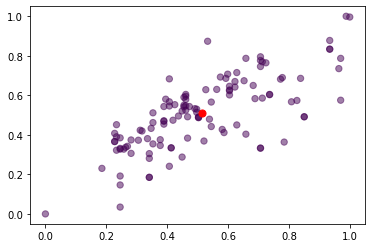

n_clusters value: 3 

[[0.50862275 0.52431425]
 [0.78153371 0.71362914]
 [0.29224884 0.31550525]]


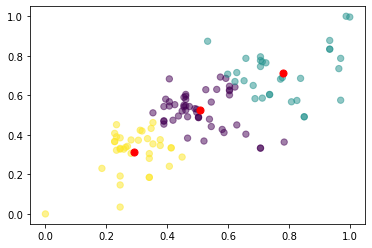

n_clusters value: 5 

[[0.2905047  0.31131824]
 [0.76686627 0.5096316 ]
 [0.46123542 0.51702993]
 [0.6480675  0.70209418]
 [0.96065013 0.86608332]]


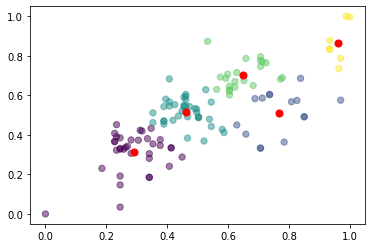

n_clusters value: 7 

[[0.96065013 0.86608332]
 [0.30581694 0.35438463]
 [0.63016823 0.70014584]
 [0.4474687  0.52632853]
 [0.79740519 0.59442965]
 [0.22925577 0.13905269]
 [0.63539587 0.39251369]]


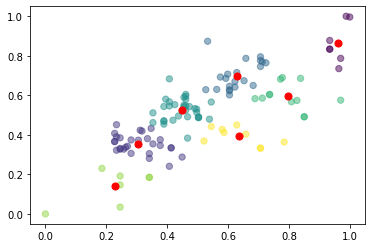

n_clusters value: 9 

[[0.63532934 0.70372836]
 [0.33907186 0.22786285]
 [0.46418275 0.54712236]
 [0.79740519 0.59442965]
 [0.96065013 0.86608332]
 [0.63539587 0.39251369]
 [0.37537425 0.41411451]
 [0.12275449 0.01731025]
 [0.24775449 0.35236352]]


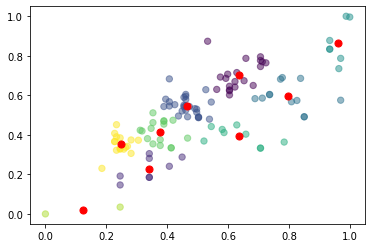

n_clusters value: 11 

[[0.26788528 0.37178499]
 [0.67215569 0.77829561]
 [0.43357729 0.53607536]
 [0.60598802 0.64172215]
 [0.54557552 0.44947477]
 [0.96065013 0.86608332]
 [0.26746507 0.16222814]
 [0.71407186 0.35818908]
 [0.8072945  0.59544849]
 [0.39401198 0.32423435]
 [0.         0.        ]]


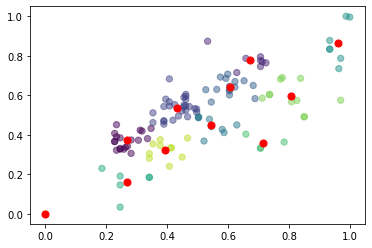

n_clusters value: 13 

[[0.45868263 0.5465779 ]
 [0.94730539 0.81331558]
 [0.25189621 0.36049711]
 [0.60018425 0.65707262]
 [0.6081171  0.40538541]
 [0.26746507 0.16222814]
 [0.84830339 0.51043054]
 [0.99401198 0.99800266]
 [0.39401198 0.32423435]
 [0.67835757 0.78733118]
 [0.36047904 0.44980027]
 [0.         0.        ]
 [0.74326347 0.63548602]]


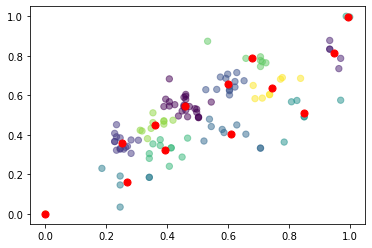

In [17]:
for k in range(1,15,2):
        print('n_clusters value:',k,'\n')
        df2  = df_scaled[['Width', 'Length']]
        kmeans = KMeans(n_clusters=k,n_init=3).fit(df2)
        centroids = kmeans.cluster_centers_
        print(centroids)

        plt.scatter(df2['Width'], df2['Length'], c= kmeans.labels_.astype(float), s=40, alpha=0.5)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
        plt.show()

In [18]:
#END